# Following CRISP-DM process, first try to address Business Problem:

## What are looking after data insights
    1. Is weekends or through week impact the data
    2. Does Seasonality categorizing the price
    3. Does neighbourhood variations
### Main factors that affecting  price of the property
### By above findings will try to create a model to predict the price of the property

# Lets try to understand the Data and in sequence will follow CRISP-DM process

### Loading Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
min_max_scaler = preprocessing.MinMaxScaler()
%matplotlib inline

### Data Collection

In [2]:
cal= pd.read_csv('calendar.csv')
lst= pd.read_csv('listings.csv')
revws= pd.read_csv('reviews.csv')

In [3]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Seems lot of columns in the dataset and not necessary towards objective. I should need to study and consider what are real factors that can make useful insights towards the objective.

# Data Analysis

### Listing Dataset and selected features

In [4]:
attributes = pd.DataFrame(lst[['id','host_is_superhost','neighbourhood', 'property_type','room_type', 'accommodates', 'bathrooms', 'bedrooms','amenities', 'price',
        'number_of_reviews', 'review_scores_rating','cancellation_policy','reviews_per_month','neighbourhood_group_cleansed']])

During data wrangling need to sure about data types and missing percentage of data 

In [5]:
def get_null_col(df):
    null_col = df.columns[df.isna().sum()>0]
    col_null_val = df[null_col].isna().sum().sort_values(ascending=False)
    per_null_val = (df[null_col].isna().sum()/df.shape[0]*100).sort_values(ascending=False)
    nulls_df = pd.DataFrame(col_null_val,columns=['Nulls_Count'])
    nulls_df['Nulls_Percentage']=per_null_val
    return nulls_df

get_null_col(attributes)

,Nulls_Count,Nulls_Percentage
review_scores_rating,647,16.946045
reviews_per_month,627,16.422211
neighbourhood,416,10.895757
bathrooms,16,0.419068
bedrooms,6,0.157150
host_is_superhost,2,0.052383
property_type,1,0.026192


Dropping review_scores_rating since we have reviews_per_month.

Dropping off neighbourhood as we have similar neighbourhood_cleansed factor adn with less missing elements and richful information too.

In [6]:
attributes.drop(['review_scores_rating','neighbourhood'], axis=1, inplace=True)

In [7]:
attributes.dtypes

id                                int64
host_is_superhost                object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
amenities                        object
price                            object
number_of_reviews                 int64
cancellation_policy              object
reviews_per_month               float64
neighbourhood_group_cleansed     object
dtype: object

bathroom, bedroom and host_is_superhost and property_type can be imputed with the mode

In [8]:
mode= attributes.filter(['bathrooms','bedrooms','host_is_superhost','property_type']).mode()
col= ['bathrooms','bedrooms','host_is_superhost','property_type']
attributes[col]=attributes[col].fillna(attributes.mode().iloc[0])

In [9]:
attributes['reviews_per_month'].fillna((attributes['reviews_per_month'].median()), inplace= True)

distribution of reviews_per_month will answer either mean or median will fit for the data

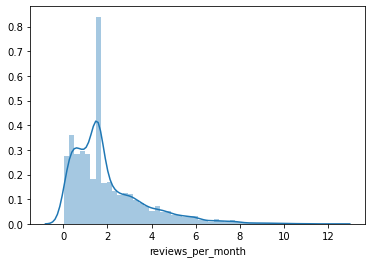

In [10]:
sns.distplot(attributes['reviews_per_month'])
plt.show()

the data is right skewed, and it would be good to use median for imputation

In [11]:
attributes['reviews_per_month'].fillna((attributes['reviews_per_month'].median()), inplace= True)

### Price variable Cleaning

In [12]:
attributes['price'] = attributes['price'].str.replace('$','')
cal['price'] = cal['price'].str.replace('$','')
attributes['price'] = attributes['price'].str.replace(',', '')
cal['price'] = cal['price'].str.replace(',', '')
attributes['price'] = attributes['price'].astype(float)
cal['price'] = cal['price'].astype(float)

In [13]:
cal['date'] = pd.to_datetime(cal['date'] )

#Computing the day of week
cal['dayofweek'] = cal['date'].apply(lambda x: x.day_name())

#Computing the month of the year
cal['month'] = cal['date'].apply(lambda x: x.month)

#Converting available to a boolean column
cal['available'] = cal['available'].apply(lambda x: x == 't')

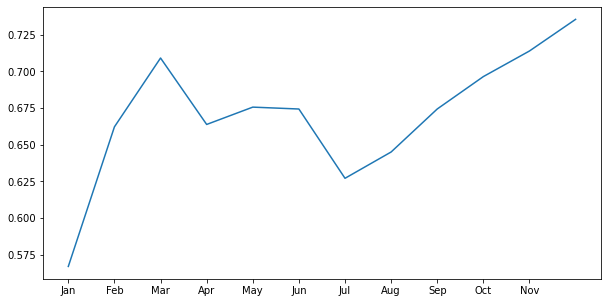

In [14]:
fig, ax = plt.subplots(1,1, figsize =(10,5))
ax.set_xticks(list(range(0,12)))
ax.set_xticklabels(calendar.month_abbr[0:12])
plt.plot(cal.groupby('month').mean().sort_values('month', ascending = True)['available'])
plt.show()

During Jan and Jul availability ratio is less, on the other hand Since Aug to Dec keeping availbility is high and Feb too.
There might be a reason to availbility percentage is low in beween April to July. That can give an insight to solve the case.

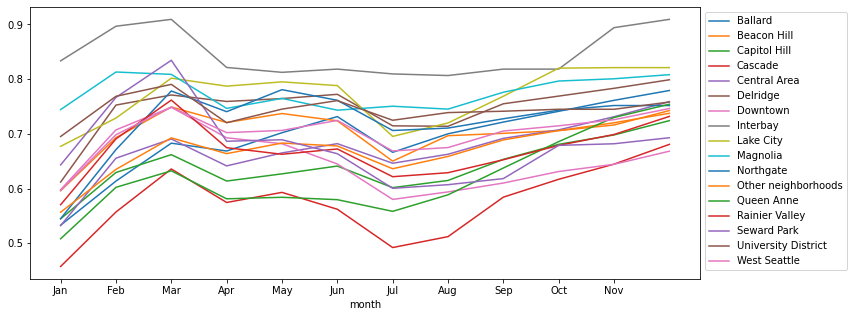

In [15]:
fig, ax = plt.subplots(1,1, figsize =(12,5))
ax.set_xticks(list(range(0,12)))
ax.set_xticklabels(calendar.month_abbr[0:12])
pd.merge(cal, attributes[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['month', 'neighbourhood_group_cleansed']).mean()['available'].unstack().plot(ax =ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

I dont think there is much variation among neighbourhood_group_cleansed,making little confusion to me.

### Feature Selection to make sure most significant factors drive towards price

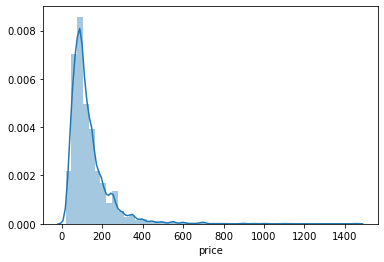

In [16]:
grouped_prices= cal.groupby('listing_id').median().round()
sns.distplot(grouped_prices['price'], hist=True)
plt.show()

Most of are in between 100 - 300$ only. But high peak @ 100$

In [36]:
attributes.groupby('neighbourhood_group_cleansed').mean().sort_values('price', ascending = False)[['price']]

,price
neighbourhood_group_cleansed,
Magnolia,177.672131
Queen Anne,157.223729
Downtown,154.405660
West Seattle,141.359606
Cascade,140.101124
Capitol Hill,130.592593
Central Area,128.338753
Ballard,124.682609
Other neighborhoods,119.968514


This is quiet intersting, few places are showig up high prices might be if I can include other major factors 
might be I can predict the price correctly.

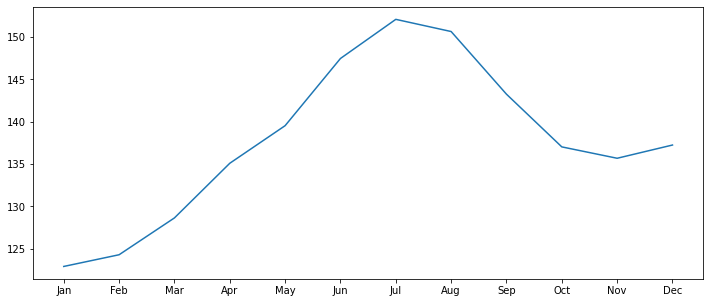

In [37]:
fig, ax = plt.subplots(1,1, figsize =(12,5))
ax.set_xticks(list(range(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.plot(cal.groupby('month').mean().sort_values('month', ascending = True)['price'])
plt.show()

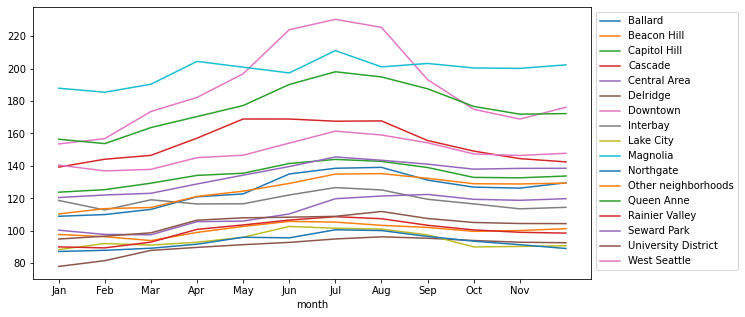

In [39]:
fig, ax = plt.subplots(1,1, figsize =(10,5))
ax.set_xticks(list(range(0,12)))
ax.set_xticklabels(calendar.month_abbr[0:12])
pd.merge(cal, attributes[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['month', 'neighbourhood_group_cleansed']).mean()['price'].unstack().plot(ax =ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

It's giving good amount of details about price hig during the season's and summer , winter are very costlier to visit Seattle.

In [45]:
pd_model_data_x = attributes[['neighbourhood_group_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms']]
pd_model_data_x['accommodates'] = min_max_scaler.fit_transform(pd_model_data_x[['accommodates']])
pd_model_data_x['bathrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bathrooms']])
pd_model_data_x['bedrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bedrooms']])

pd_model_data_x = pd.get_dummies(pd_model_data_x, columns=['neighbourhood_group_cleansed','property_type','room_type'])
pd_model_data_y = attributes['price']

# Will try to populate differnent Models to ensure score and MSE

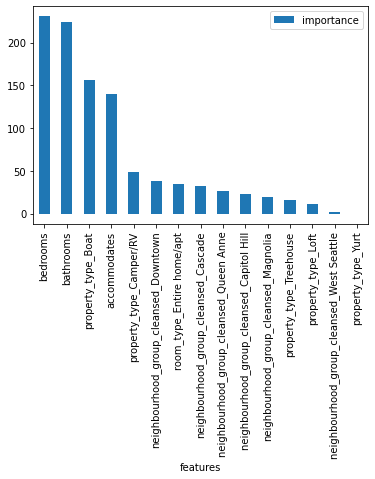

In [46]:
# train and test x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.2, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_test_preds = lm.predict(X_test)
y_train_preds = lm.predict(X_train)

coefficients = pd.DataFrame({'features': X_train.columns, 'importance': lm.coef_})
coefficients = coefficients.sort_values('importance', ascending=False)[:15].plot(x='features', y='importance', kind='bar')

By above feature selection bedrooms,bathrooms, property_type and accommodates are most significant features to the price.

# Evaluate the Results

In [47]:
lm_mse = metrics.mean_squared_error(y_test, lm.predict(X_test))
lm_mse = np.sqrt(lm_mse)
print('LR MSE test: %.2f'% lm_mse)
print('LR R^2 test: %.2f, test: %.2f' % (r2_score(y_train, y_train_preds),r2_score(y_test, y_test_preds)))

LR MSE test: 58.67
LR R^2 test: 0.57, test: 0.58


In [52]:
Dec_tree_reg = DecisionTreeRegressor() 
Dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
des_tree_mse = metrics.mean_squared_error(y_test, Dec_tree_reg.predict(X_test))
des_tree_mse = np.sqrt(des_tree_mse)
print('DT MSE test: %.2f'% des_tree_mse)
print('DT R^2 test: %.2f' % (r2_score(y_test, y_test_preds)))

DT MSE test: 68.78
DT R^2 test: 0.58


In [55]:
forest = RandomForestRegressor(n_estimators=200,max_features='sqrt',criterion='mse', random_state=42, n_jobs=1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('RF MSE train: %.2f, test: %.2f' % (np.sqrt(mean_squared_error(y_train, y_train_preds)),np.sqrt(mean_squared_error(y_test, y_test_preds))))
print('RF R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_preds),r2_score(y_test, y_test_preds)))

RF MSE train: 42.00, test: 57.01
RF R^2 train: 0.78, test: 0.60


In [56]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.05, gamma=0.0,colsample_bytree=0.2, max_depth=4)
xgb.fit(X_train,y_train)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('Xgboost MSE train: %.2f, test: %.2f' % (np.sqrt(mean_squared_error(y_train, y_train_preds)),np.sqrt(mean_squared_error(y_test, y_test_preds))))
print('Xgboost R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_preds),r2_score(y_test, y_test_preds)))

[00:55:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost MSE train: 53.53, test: 55.14
Xgboost R^2 train: 0.65, test: 0.63


By above all model's performance RF and Xgboost have maintained low MSE and better coefficient of determention.